<a href="https://colab.research.google.com/github/ashmeer/PADG-Pred/blob/main/Github_Park_FVCode_olddataset_cdhit_0_70_np100K.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re
import os
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix
from statistics import mean
import math
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import matthews_corrcoef
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
from sklearn.manifold import TSNE
from __future__ import print_function
import time
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Basic Standerization**

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
import pandas as pd
import numpy as np

# Load your dataset
dataset = pd.read_csv('/content/drive/MyDrive/FV_old_park_0.70.csv', sep=',',header=None)

def replace_text_in_dataframe(text, replacement, dataframe):
    return dataframe.applymap(lambda x: replacement if str(x) == text else x)

numeric_cols = dataset.select_dtypes(include=[np.number])

# Replace NaN values with the minimum value in each numeric column
dataset[numeric_cols.columns] = numeric_cols.fillna(numeric_cols.min())

# Replace infinity values with the maximum value in each numeric column
for column in numeric_cols.columns:
    max_value = dataset[column].max()
    dataset[column].replace([np.inf, -np.inf], max_value, inplace=True)

# Separate features (X) and target variable (y)
X = dataset.iloc[:, :-1].values  # Assuming the last column is the target variable
y = dataset.iloc[:, -1].values


In [ ]:
y

array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np

std_scale = MinMaxScaler()
X = np.nan_to_num(X.astype('float32'))
X_scaled = std_scale.fit_transform(X)

<ipython-input-8-1faa593dbc0d>:5: RuntimeWarning: overflow encountered in cast
  X = np.nan_to_num(X.astype('float32'))


# Self-**Consistency**

In [ ]:
clf2=LGBMClassifier()
clf1=RandomForestClassifier(n_estimators=100, max_depth=50, oob_score=True, n_jobs=-1, warm_start=True)
clf3 = XGBClassifier(n_estimators=100, max_depth=9, learning_rate=0.1)
clf4=ExtraTreesClassifier(n_estimators=100, max_depth=None, min_samples_split=2)
clf6= BaggingClassifier()

In [ ]:
lr = LogisticRegression(random_state=42)

# Define your stacking classifier with the base learners and meta-learner
clf5 = StackingClassifier(
    estimators=[('xgb', clf3),('rf', clf1) ],final_estimator=lr)

In [ ]:
print('Self-Consistency Random Forest')
clf = clf1.fit(X, y)
pred=np.round(clf.predict(X))
tn, fp, fn, tp = confusion_matrix(y, pred, labels=[1, 0]).ravel()
acc = np.round(((tn + tp) / (tn + fp + fn + tp)) * 100, 2)
sp = np.round((tn / (fp + tn)) * 100, 2)
sn = np.round((tp / (tp + fn)) * 100, 2)
mcc = np.round(matthews_corrcoef(y, pred), 5)
pre = np.round((tp / (tp + fp)) * 100, 2)
f1 = np.round(2 * (pre * sn) / (pre + sn), 2)
print("Accuracy: " + str(acc))
print("Sensitivity/Recall: " + str(sn))
print("Specificity: " + str(sp))
print("MCC: " + str(mcc))
print("Precision: " + str(pre))
print("F1_Score: " + str(f1))

ns_probs=[0 for _ in range(len(y))]
lr_probs=clf.predict_proba(X)
# keep probabilities for the positive outcome only
lr_probs=lr_probs[:, 1]

# calculate roc curves
ns_fpr1, ns_tpr1, _=roc_curve(y, ns_probs)
lr_fpr1, lr_tpr1, _=roc_curve(y, lr_probs)
auc_score = round(roc_auc_score(y, lr_probs),2)

print('Self-Consistency LGBM')
clf=clf2.fit(X, y)
pred=np.round(clf.predict(X))
tn, fp, fn, tp = confusion_matrix(y, pred, labels=[1, 0]).ravel()
acc = np.round(((tn + tp) / (tn + fp + fn + tp)) * 100, 2)
sp = np.round((tn / (fp + tn)) * 100, 2)
sn = np.round((tp / (tp + fn)) * 100, 2)
mcc = np.round(matthews_corrcoef(y, pred), 5)
pre = np.round((tp / (tp + fp)) * 100, 2)
f1 = np.round(2 * (pre * sn) / (pre + sn), 2)
print("Accuracy: " + str(acc))
print("Sensitivity/Recall: " + str(sn))
print("Specificity: " + str(sp))
print("MCC: " + str(mcc))
print("Precision: " + str(pre))
print("F1_Score: " + str(f1))

ns_probs2=[0 for _ in range(len(y))]
lr_probs2=clf.predict_proba(X)
# keep probabilities for the positive outcome only
lr_probs2=lr_probs2[:, 1]

# calculate roc curves
ns_fpr2, ns_tpr2, _=roc_curve(y, ns_probs2)
lr_fpr2, lr_tpr2, _=roc_curve(y, lr_probs2)
auc_score2 = round(roc_auc_score(y, lr_probs2),2)

print('Self-Consistency XGB')
clf=clf3.fit(X, y)
pred=np.round(clf.predict(X))
tn, fp, fn, tp = confusion_matrix(y, pred, labels=[1, 0]).ravel()
acc = np.round(((tn + tp) / (tn + fp + fn + tp)) * 100, 2)
sp = np.round((tn / (fp + tn)) * 100, 2)
sn = np.round((tp / (tp + fn)) * 100, 2)
mcc = np.round(matthews_corrcoef(y, pred), 5)
pre = np.round((tp / (tp + fp)) * 100, 2)
f1 = np.round(2 * (pre * sn) / (pre + sn), 2)
print("Accuracy: " + str(acc))
print("Sensitivity/Recall: " + str(sn))
print("Specificity: " + str(sp))
print("MCC: " + str(mcc))
print("Precision: " + str(pre))
print("F1_Score: " + str(f1))

ns_probs3=[0 for _ in range(len(y))]
lr_probs3=clf.predict_proba(X)
# keep probabilities for the positive outcome only
lr_probs3=lr_probs3[:, 1]

# calculate roc curves
ns_fpr3, ns_tpr3, _=roc_curve(y, ns_probs3)
lr_fpr3, lr_tpr3, _=roc_curve(y, lr_probs3)
auc_score3 = round(roc_auc_score(y, lr_probs3),2)


print('Self-Consistency ET')
clf=clf4.fit(X,y)
pred=np.round(clf.predict(X))
tn, fp, fn, tp = confusion_matrix(y, pred, labels=[1, 0]).ravel()
acc = np.round(((tn + tp) / (tn + fp + fn + tp)) * 100, 2)
sp = np.round((tn / (fp + tn)) * 100, 2)
sn = np.round((tp / (tp + fn)) * 100, 2)
mcc = np.round(matthews_corrcoef(y, pred), 5)
pre = np.round((tp / (tp + fp)) * 100, 2)
f1 = np.round(2 * (pre * sn) / (pre + sn), 2)
print("Accuracy: " + str(acc))
print("Sensitivity/Recall: " + str(sn))
print("Specificity: " + str(sp))
print("MCC: " + str(mcc))
print("Precision: " + str(pre))
print("F1_Score: " + str(f1))

ns_probs4=[0 for _ in range(len(y))]
lr_probs4=clf.predict_proba(X)
# keep probabilities for the positive outcome only
lr_probs4=lr_probs4[:, 1]

# calculate roc curves
ns_fpr4, ns_tpr4, _=roc_curve(y, ns_probs4)
lr_fpr4, lr_tpr4, _=roc_curve(y, lr_probs4)
auc_score4 = round(roc_auc_score(y, lr_probs4),2)

print('Self-Consistency Stacking')
clf=clf5.fit(X, y)
pred=np.round(clf.predict(X))
tn, fp, fn, tp = confusion_matrix(y, pred, labels=[1, 0]).ravel()
acc = np.round(((tn + tp) / (tn + fp + fn + tp)) * 100, 2)
sp = np.round((tn / (fp + tn)) * 100, 2)
sn = np.round((tp / (tp + fn)) * 100, 2)
mcc = np.round(matthews_corrcoef(y, pred), 5)
pre = np.round((tp / (tp + fp)) * 100, 2)
f1 = np.round(2 * (pre * sn) / (pre + sn), 2)
print("Accuracy: " + str(acc))
print("Sensitivity/Recall: " + str(sn))
print("Specificity: " + str(sp))
print("MCC: " + str(mcc))
print("Precision: " + str(pre))
print("F1_Score: " + str(f1))

ns_probs5=[0 for _ in range(len(y))]
lr_probs5=clf.predict_proba(X)
# keep probabilities for the positive outcome only
lr_probs5=lr_probs5[:, 1]

# calculate roc curves
ns_fpr5, ns_tpr5, _=roc_curve(y, ns_probs5)
lr_fpr5, lr_tpr5, _=roc_curve(y, lr_probs5)
auc_score5 = round(roc_auc_score(y, lr_probs5),2)



print('Self-Consistency Bagging')
clf=clf6.fit(X, y)
pred=np.round(clf.predict(X))
tn, fp, fn, tp = confusion_matrix(y, pred, labels=[1, 0]).ravel()
acc = np.round(((tn + tp) / (tn + fp + fn + tp)) * 100, 2)
sp = np.round((tn / (fp + tn)) * 100, 2)
sn = np.round((tp / (tp + fn)) * 100, 2)
mcc = np.round(matthews_corrcoef(y, pred), 5)
pre = np.round((tp / (tp + fp)) * 100, 2)
f1 = np.round(2 * (pre * sn) / (pre + sn), 2)
print("Accuracy: " + str(acc))
print("Sensitivity/Recall: " + str(sn))
print("Specificity: " + str(sp))
print("MCC: " + str(mcc))
print("Precision: " + str(pre))
print("F1_Score: " + str(f1))

ns_probs6=[0 for _ in range(len(y))]
lr_probs6=clf.predict_proba(X)
# keep probabilities for the positive outcome only
lr_probs6=lr_probs6[:, 1]

# calculate roc curves
ns_fpr6, ns_tpr6, _=roc_curve(y, ns_probs6)
lr_fpr6, lr_tpr6, _=roc_curve(y, lr_probs6)
auc_score6 = round(roc_auc_score(y, lr_probs6),2)

Self-Consistency Random Forest


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:452: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(


Accuracy: 100.0
Sensitivity/Recall: 100.0
Specificity: 100.0
MCC: 1.0
Precision: 100.0
F1_Score: 100.0
Self-Consistency LGBM
[LightGBM] [Info] Number of positive: 895, number of negative: 914
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.023282 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 130189
[LightGBM] [Info] Number of data points in the train set: 1809, number of used features: 516
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.494748 -> initscore=-0.021007
[LightGBM] [Info] Start training from score -0.021007
Accuracy: 100.0
Sensitivity/Recall: 100.0
Specificity: 100.0
MCC: 1.0
Precision: 100.0
F1_Score: 100.0
Self-Consistency XGB
Accuracy: 100.0
Sensitivity/Recall: 100.0
Specificity: 100.0
MCC: 1.0
Precision: 100.0
F1_Score: 100.0
Self-Consistency ET
Accuracy: 100.0
Sensitivity/Recall: 100.0
Specificity: 100.0
MCC: 1.0
Precision: 100.0
F1_Score: 100.0
Self-Consistency Stacking
Accurac

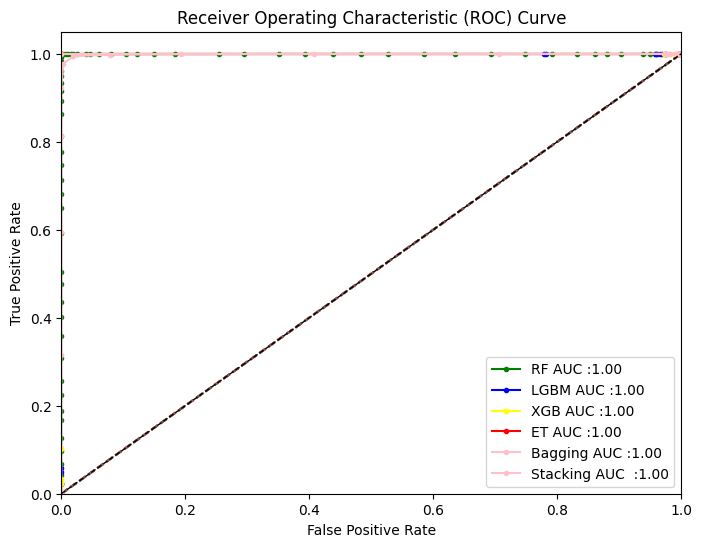

In [ ]:
import matplotlib as mpl

from matplotlib import pyplot

#pyplot.figure(figsize=(20, 10), dpi=600)
pyplot.figure(figsize=(8, 6))
# plot the roc curve for the model
pyplot.title("Self Consistency Graph")
pyplot.plot(ns_fpr1, ns_tpr1, linestyle='--')
pyplot.plot(lr_fpr1, lr_tpr1, marker='.', color='green', label='RF AUC :{:.2f}'.format(auc_score))

pyplot.plot(ns_fpr2, ns_tpr2, linestyle='--')
pyplot.plot(lr_fpr2, lr_tpr2, marker='.', color='blue', label='LGBM AUC :{:.2f}'.format(auc_score2))

pyplot.plot(ns_fpr3, ns_tpr3, linestyle='--')
pyplot.plot(lr_fpr3, lr_tpr3, marker='.', color='yellow', label='XGB AUC :{:.2f}'.format(auc_score3))

pyplot.plot(ns_fpr4, ns_tpr4, linestyle='--')
pyplot.plot(lr_fpr4, lr_tpr4, marker='.', color='red', label='ET AUC :{:.2f}'.format(auc_score4))

pyplot.plot(ns_fpr6, ns_tpr6, linestyle='--')
pyplot.plot(lr_fpr6, lr_tpr6, marker='.', color='pink', label='Bagging AUC :{:.2f}'.format(auc_score6))

pyplot.plot(ns_fpr5, ns_tpr5, linestyle='--')
pyplot.plot(lr_fpr5, lr_tpr5, marker='.', color='pink', label='Stacking AUC  :{:.2f}'.format(auc_score5))

# axis labels
#pyplot.xlabel('False Positive Rate')
#pyplot.ylabel('True Positive Rate')
# show the legend
#pyplot.legend(loc="lower right", fontsize=20, ncol=1)
# show the plot
#pyplot.show()


pyplot.plot([0, 1], [0, 1], color='black', lw=1, linestyle='--')
pyplot.xlim([0.0, 1.0])
pyplot.ylim([0.0, 1.05])
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.title('Receiver Operating Characteristic (ROC) Curve')
pyplot.legend(loc='lower right')
pyplot.show()



# **Independent Test**

In [ ]:
clf2=LGBMClassifier()
clf1=RandomForestClassifier(n_estimators=100, max_depth=50, oob_score=True, n_jobs=-1, warm_start=True)
clf3 = XGBClassifier(n_estimators=100, max_depth=9, learning_rate=0.1)
clf4=ExtraTreesClassifier(n_estimators=100, max_depth=None, min_samples_split=2)
clf6= BaggingClassifier()

In [ ]:
seed = np.random.seed(5)
inputSize=522

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
print('Independent Dataset Test Random Forest')
clf=clf1.fit(X_train, Y_train)
pred=np.round(clf.predict(X_test))
tn, fp, fn, tp = confusion_matrix(Y_test, pred, labels=[1, 0]).ravel()
acc = np.round(((tn + tp) / (tn + fp + fn + tp)) * 100, 2)
sp = np.round((tn / (fp + tn)) * 100, 2)
sn = np.round((tp / (tp + fn)) * 100, 2)
mcc = np.round(matthews_corrcoef(Y_test, pred), 5)
pre = np.round((tp / (tp + fp)) * 100, 2)
f1 = np.round(2 * (pre * sn) / (pre + sn), 2)
print("Accuracy: " + str(acc))
print("Sensitivity/Recall: " + str(sn))
print("Specificity: " + str(sp))
print("MCC: " + str(mcc))
print("Precision: " + str(pre))
print("F1_Score: " + str(f1))

ns_probs=[0 for _ in range(len(Y_test))]
lr_probs=clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs=lr_probs[:, 1]

# calculate roc curves
ns_fpr1, ns_tpr1, _=roc_curve(Y_test, ns_probs)
lr_fpr1, lr_tpr1, _=roc_curve(Y_test, lr_probs)
auc_score = round(roc_auc_score(Y_test, lr_probs),2)

Independent Dataset Test Random Forest
Accuracy: 93.65
Sensitivity/Recall: 93.49
Specificity: 93.78
MCC: 0.87243
Precision: 92.94
F1_Score: 93.21


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:452: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(


In [ ]:
print('Independent Dataset Test LGBM')
clf=clf2.fit(X_train, Y_train)
pred=np.round(clf.predict(X_test))
tn, fp, fn, tp = confusion_matrix(Y_test, pred, labels=[1, 0]).ravel()
acc = np.round(((tn + tp) / (tn + fp + fn + tp)) * 100, 2)
sp = np.round((tn / (fp + tn)) * 100, 2)
sn = np.round((tp / (tp + fn)) * 100, 2)
mcc = np.round(matthews_corrcoef(Y_test, pred), 5)
pre = np.round((tp / (tp + fp)) * 100, 2)
f1 = np.round(2 * (pre * sn) / (pre + sn), 2)
print("Accuracy: " + str(acc))
print("Sensitivity/Recall: " + str(sn))
print("Specificity: " + str(sp))
print("MCC: " + str(mcc))
print("Precision: " + str(pre))
print("F1_Score: " + str(f1))

ns_probs2=[0 for _ in range(len(Y_test))]
lr_probs2=clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs2=lr_probs2[:, 1]

# calculate roc curves
ns_fpr2, ns_tpr2, _=roc_curve(Y_test, ns_probs2)
lr_fpr2, lr_tpr2, _=roc_curve(Y_test, lr_probs2)
auc_score2 = round(roc_auc_score(Y_test, lr_probs2),2)


Independent Dataset Test LGBM
[LightGBM] [Info] Number of positive: 811, number of negative: 817
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.023619 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 129652
[LightGBM] [Info] Number of data points in the train set: 1628, number of used features: 516
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.498157 -> initscore=-0.007371
[LightGBM] [Info] Start training from score -0.007371
Accuracy: 71.27
Sensitivity/Recall: 70.1
Specificity: 72.62
MCC: 0.42612
Precision: 74.73
F1_Score: 72.34


In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=seed)

print('Independent Dataset Test XGB')
clf=clf3.fit(X_train, Y_train)
pred=np.round(clf.predict(X_test))
tn, fp, fn, tp = confusion_matrix(Y_test, pred, labels=[1, 0]).ravel()
acc = np.round(((tn + tp) / (tn + fp + fn + tp)) * 100, 2)
sp = np.round((tn / (fp + tn)) * 100, 2)
sn = np.round((tp / (tp + fn)) * 100, 2)
mcc = np.round(matthews_corrcoef(Y_test, pred), 5)
pre = np.round((tp / (tp + fp)) * 100, 2)
f1 = np.round(2 * (pre * sn) / (pre + sn), 2)
print("Accuracy: " + str(acc))
print("Sensitivity/Recall: " + str(sn))
print("Specificity: " + str(sp))
print("MCC: " + str(mcc))
print("Precision: " + str(pre))
print("F1_Score: " + str(f1))

ns_probs3=[0 for _ in range(len(Y_test))]
lr_probs3=clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs3=lr_probs3[:, 1]

# calculate roc curves
ns_fpr3, ns_tpr3, _=roc_curve(Y_test, ns_probs3)
lr_fpr3, lr_tpr3, _=roc_curve(Y_test, lr_probs3)
auc_score3 = round(roc_auc_score(Y_test, lr_probs3),2)



Independent Dataset Test XGB
Accuracy: 72.38
Sensitivity/Recall: 76.29
Specificity: 67.86
MCC: 0.44331
Precision: 73.27
F1_Score: 74.75


In [ ]:
print('Independent Dataset Test ET')
clf=clf4.fit(X_train, Y_train)
pred=np.round(clf.predict(X_test))
tn, fp, fn, tp = confusion_matrix(Y_test, pred, labels=[1, 0]).ravel()
acc = np.round(((tn + tp) / (tn + fp + fn + tp)) * 100, 2)
sp = np.round((tn / (fp + tn)) * 100, 2)
sn = np.round((tp / (tp + fn)) * 100, 2)
mcc = np.round(matthews_corrcoef(Y_test, pred), 5)
pre = np.round((tp / (tp + fp)) * 100, 2)
f1 = np.round(2 * (pre * sn) / (pre + sn), 2)
print("Accuracy: " + str(acc))
print("Sensitivity/Recall: " + str(sn))
print("Specificity: " + str(sp))
print("MCC: " + str(mcc))
print("Precision: " + str(pre))
print("F1_Score: " + str(f1))

ns_probs4=[0 for _ in range(len(Y_test))]
lr_probs4=clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs4=lr_probs4[:, 1]

# calculate roc curves
ns_fpr4, ns_tpr4, _=roc_curve(Y_test, ns_probs4)
lr_fpr4, lr_tpr4, _=roc_curve(Y_test, lr_probs4)
auc_score4 = round(roc_auc_score(Y_test, lr_probs4),2)

Independent Dataset Test ET
Accuracy: 72.93
Sensitivity/Recall: 74.23
Specificity: 71.43
MCC: 0.45622
Precision: 75.0
F1_Score: 74.61


In [ ]:
print('Independent Dataset Test Bagging')
clf=clf6.fit(X_train, Y_train)
pred=np.round(clf.predict(X_test))
tn, fp, fn, tp = confusion_matrix(Y_test, pred, labels=[1, 0]).ravel()
acc = np.round(((tn + tp) / (tn + fp + fn + tp)) * 100, 2)
sp = np.round((tn / (fp + tn)) * 100, 2)
sn = np.round((tp / (tp + fn)) * 100, 2)
mcc = np.round(matthews_corrcoef(Y_test, pred), 5)
pre = np.round((tp / (tp + fp)) * 100, 2)
f1 = np.round(2 * (pre * sn) / (pre + sn), 2)
print("Accuracy: " + str(acc))
print("Sensitivity/Recall: " + str(sn))
print("Specificity: " + str(sp))
print("MCC: " + str(mcc))
print("Precision: " + str(pre))
print("F1_Score: " + str(f1))

ns_probs6=[0 for _ in range(len(Y_test))]
lr_probs6=clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs6=lr_probs6[:, 1]

# calculate roc curves
ns_fpr6, ns_tpr6, _=roc_curve(Y_test, ns_probs6)
lr_fpr6, lr_tpr6, _=roc_curve(Y_test, lr_probs6)
auc_score6 = round(roc_auc_score(Y_test, lr_probs6),2)

Independent Dataset Test Bagging
Accuracy: 71.82
Sensitivity/Recall: 77.32
Specificity: 65.48
MCC: 0.43168
Precision: 72.12
F1_Score: 74.63


In [ ]:
lr = LogisticRegression(random_state=42)

# Define your stacking classifier with the base learners and meta-learner
clf5 = StackingClassifier(
    estimators=[('lgbm', clf2),('rf', clf1) ],final_estimator=lr)

In [ ]:
print('Independent Dataset Test 5-ENsemble')
clf=clf5.fit(X_train, Y_train)
pred=np.round(clf.predict(X_test))
tn, fp, fn, tp = confusion_matrix(Y_test, pred, labels=[1, 0]).ravel()
acc = np.round(((tn + tp) / (tn + fp + fn + tp)) * 100, 2)
sp = np.round((tn / (fp + tn)) * 100, 2)
sn = np.round((tp / (tp + fn)) * 100, 2)
mcc = np.round(matthews_corrcoef(Y_test, pred), 5)
pre = np.round((tp / (tp + fp)) * 100, 2)
f1 = np.round(2 * (pre * sn) / (pre + sn), 2)
print("Accuracy: " + str(acc))
print("Sensitivity/Recall: " + str(sn))
print("Specificity: " + str(sp))
print("MCC: " + str(mcc))
print("Precision: " + str(pre))
print("F1_Score: " + str(f1))

ns_probs5=[0 for _ in range(len(Y_test))]
lr_probs5=clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs5=lr_probs5[:, 1]

# calculate roc curves
ns_fpr5, ns_tpr5, _=roc_curve(Y_test, ns_probs5)
lr_fpr5, lr_tpr5, _=roc_curve(Y_test, lr_probs5)
auc_score5 = round(roc_auc_score(Y_test, lr_probs5),2)

Independent Dataset Test 5-ENsemble
[LightGBM] [Info] Number of positive: 811, number of negative: 817
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.062261 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 129652
[LightGBM] [Info] Number of data points in the train set: 1628, number of used features: 516
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.498157 -> initscore=-0.007371
[LightGBM] [Info] Start training from score -0.007371
[LightGBM] [Info] Number of positive: 648, number of negative: 654
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.026621 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 128970
[LightGBM] [Info] Number of data points in the train set: 1302, number of used features: 516
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.497696 -> initscore=-0.009217
[LightGBM] [Info] Start training f

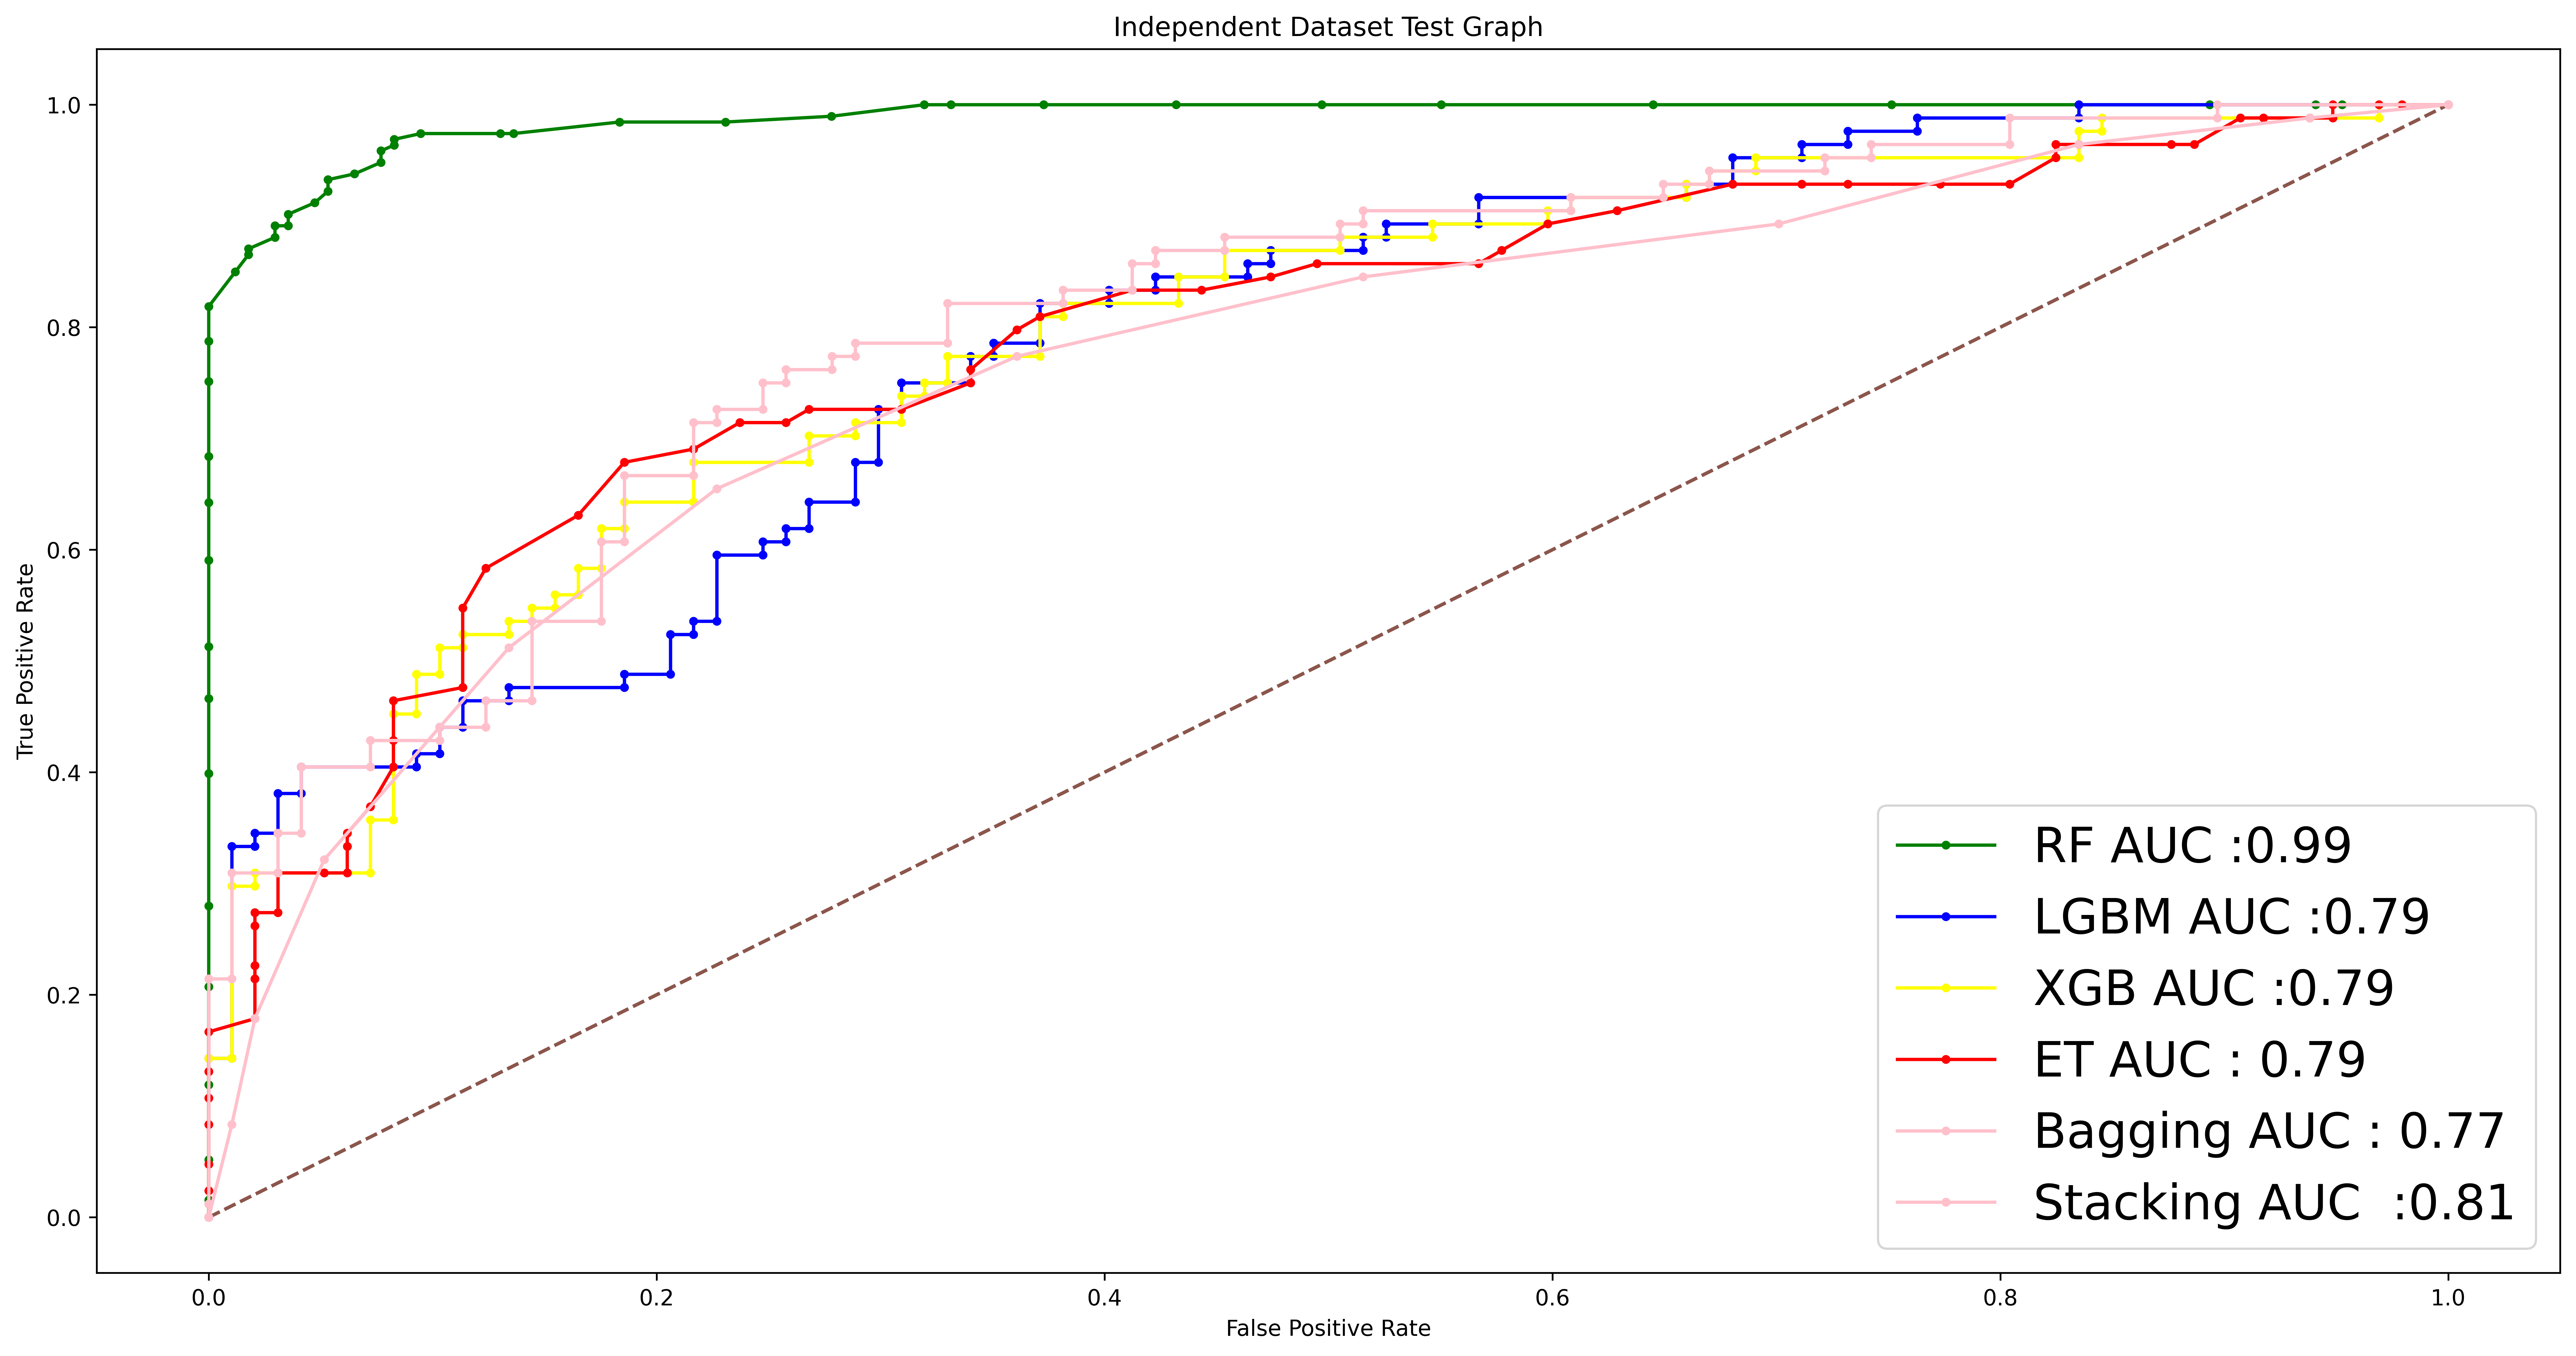

In [ ]:
# replace X1 with X_test and Y1 with y_test
from sklearn.metrics import roc_curve, roc_auc_score
from matplotlib import pyplot

#pyplot.rcParams['figure.dpi'] = 200

pyplot.figure(figsize=(20, 10), dpi=600)

# plot the roc curve for the model
#plt.plot(lr_fpr1, lr_tpr1, marker='.', color='green', label=f'RF AUC : {auc_score:.3f}')
#plt.plot(lr_fpr1, lr_tpr1, marker='.', color='green', label='RF AUC : {:.3f}'.format(auc_score))

pyplot.title("Independent Dataset Test Graph")
pyplot.plot(ns_fpr1, ns_tpr1, linestyle='--')
pyplot.plot(lr_fpr1, lr_tpr1, marker='.', color='green', label='RF AUC :{:.2f}'.format(auc_score))

pyplot.plot(ns_fpr2, ns_tpr2, linestyle='--')
pyplot.plot(lr_fpr2, lr_tpr2, marker='.', color='blue', label='LGBM AUC :{:.2f}'.format(auc_score2))

pyplot.plot(ns_fpr3, ns_tpr3, linestyle='--')
pyplot.plot(lr_fpr3, lr_tpr3, marker='.', color='yellow', label='XGB AUC :{:.2f}'.format(auc_score3))

pyplot.plot(ns_fpr4, ns_tpr4, linestyle='--')
pyplot.plot(lr_fpr4, lr_tpr4, marker='.', color='red', label='ET AUC : '+str(auc_score4))

pyplot.plot(ns_fpr6, ns_tpr6, linestyle='--')
pyplot.plot(lr_fpr6, lr_tpr6, marker='.', color='pink', label='Bagging AUC : '+str(auc_score6))

pyplot.plot(ns_fpr5, ns_tpr5, linestyle='--')
pyplot.plot(lr_fpr5, lr_tpr5, marker='.', color='pink', label='Stacking AUC  :{:.2f}'.format(auc_score5))
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend(loc="lower right", fontsize=22, ncol=1)
# show the plot
pyplot.show()

# **10 fold**

In [ ]:
from sklearn.model_selection import StratifiedKFold, KFold

In [ ]:
clf2=LGBMClassifier()
clf1=RandomForestClassifier(n_estimators=50, max_depth=25, oob_score=True, n_jobs=-1, warm_start=True)
clf3 = XGBClassifier(n_estimators=100, max_depth=9, learning_rate=0.1)
clf4=ExtraTreesClassifier()
clf6 = BaggingClassifier(random_state=42)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
kfold=StratifiedKFold(n_splits=10, shuffle=True)

print('10-fold Cross-Validation Random Forest')
iterator = 1
for train, test in kfold.split(X, y):
  print("Fold : " + str(iterator))
  X_train = X[train]
  Y_train = y[train]
  X_test = X[test]
  Y_test = y[test]
  clf=clf1.fit(X_train, Y_train)
  pred=np.round(clf.predict(X_test))
  tn, fp, fn, tp = confusion_matrix(Y_test, pred, labels=[1, 0]).ravel()
  acc = np.round(((tn + tp) / (tn + fp + fn + tp)) * 100, 2)
  sp = np.round((tn / (fp + tn)) * 100, 2)
  sn = np.round((tp / (tp + fn)) * 100, 2)
  mcc = np.round(matthews_corrcoef(Y_test, pred), 5)
  pre = np.round((tp / (tp + fp)) * 100, 2)
  f1 = np.round(2 * (pre * sn) / (pre + sn), 2)
  print("Accuracy: " + str(acc))
  print("Sensitivity/Recall: " + str(sn))
  print("Specificity: " + str(sp))
  print("MCC: " + str(mcc))
  print("Precision: " + str(pre))
  print("F1_Score: " + str(f1))
  iterator = iterator+1

10-fold Cross-Validation Random Forest
Fold : 1
Accuracy: 97.24
Sensitivity/Recall: 96.7
Specificity: 97.78
MCC: 0.94481
Precision: 97.78
F1_Score: 97.24
Fold : 2


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:452: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:452: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(


Accuracy: 96.13
Sensitivity/Recall: 98.9
Specificity: 93.33
MCC: 0.92404
Precision: 93.75
F1_Score: 96.26
Fold : 3
Accuracy: 97.24
Sensitivity/Recall: 97.8
Specificity: 96.67
MCC: 0.9448
Precision: 96.74
F1_Score: 97.27
Fold : 4
Accuracy: 95.03
Sensitivity/Recall: 95.6
Specificity: 94.44
MCC: 0.9006
Precision: 94.57
F1_Score: 95.08
Fold : 5


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:452: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:452: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:452: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(


Accuracy: 93.92
Sensitivity/Recall: 96.7
Specificity: 91.11
MCC: 0.87976
Precision: 91.67
F1_Score: 94.12
Fold : 6
Accuracy: 96.69
Sensitivity/Recall: 97.83
Specificity: 95.51
MCC: 0.93389
Precision: 95.74
F1_Score: 96.77
Fold : 7


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:452: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:452: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(


Accuracy: 96.69
Sensitivity/Recall: 94.57
Specificity: 98.88
MCC: 0.93464
Precision: 98.86
F1_Score: 96.67
Fold : 8
Accuracy: 97.24
Sensitivity/Recall: 96.74
Specificity: 97.75
MCC: 0.9448
Precision: 97.8
F1_Score: 97.27
Fold : 9


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:452: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:452: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(


Accuracy: 98.9
Sensitivity/Recall: 97.83
Specificity: 100.0
MCC: 0.97814
Precision: 100.0
F1_Score: 98.9
Fold : 10
Accuracy: 97.22
Sensitivity/Recall: 100.0
Specificity: 94.38
MCC: 0.94587
Precision: 94.79
F1_Score: 97.33


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:452: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(


In [ ]:
kfold=StratifiedKFold(n_splits=10, shuffle=True)

print('10-fold Cross-Validation LGBM')
iterator = 1
for train, test in kfold.split(X, y):
  print("Fold : " + str(iterator))
  X_train = X[train]
  Y_train = y[train]
  X_test = X[test]
  Y_test = y[test]
  clf=clf2.fit(X_train, Y_train)
  pred=np.round(clf.predict(X_test))
  tn, fp, fn, tp = confusion_matrix(Y_test, pred, labels=[1, 0]).ravel()
  acc = np.round(((tn + tp) / (tn + fp + fn + tp)) * 100, 2)
  sp = np.round((tn / (fp + tn)) * 100, 2)
  sn = np.round((tp / (tp + fn)) * 100, 2)
  mcc = np.round(matthews_corrcoef(Y_test, pred), 5)
  pre = np.round((tp / (tp + fp)) * 100, 2)
  f1 = np.round(2 * (pre * sn) / (pre + sn), 2)
  print("Accuracy: " + str(acc))
  print("Sensitivity/Recall: " + str(sn))
  print("Specificity: " + str(sp))
  print("MCC: " + str(mcc))
  print("Precision: " + str(pre))
  print("F1_Score: " + str(f1))
  iterator = iterator+1

10-fold Cross-Validation LGBM
Fold : 1
[LightGBM] [Info] Number of positive: 805, number of negative: 823
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.022907 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 130006
[LightGBM] [Info] Number of data points in the train set: 1628, number of used features: 516
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.494472 -> initscore=-0.022114
[LightGBM] [Info] Start training from score -0.022114
Accuracy: 71.82
Sensitivity/Recall: 71.43
Specificity: 72.22
MCC: 0.43651
Precision: 72.22
F1_Score: 71.82
Fold : 2
[LightGBM] [Info] Number of positive: 805, number of negative: 823
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.024726 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 130009
[LightGBM] [Info] Number of data points in the train set: 1628, number of used features:

In [ ]:
kfold=StratifiedKFold(n_splits=10, shuffle=True)

print('10-fold Cross-Validation XGB')
iterator = 1
for train, test in kfold.split(X, y):
  print("Fold : " + str(iterator))
  X_train = X[train]
  Y_train = y[train]
  X_test = X[test]
  Y_test = y[test]
  clf=clf3.fit(X_train, Y_train)
  pred=np.round(clf.predict(X_test))
  tn, fp, fn, tp = confusion_matrix(Y_test, pred, labels=[1, 0]).ravel()
  acc = np.round(((tn + tp) / (tn + fp + fn + tp)) * 100, 2)
  sp = np.round((tn / (fp + tn)) * 100, 2)
  sn = np.round((tp / (tp + fn)) * 100, 2)
  mcc = np.round(matthews_corrcoef(Y_test, pred), 5)
  pre = np.round((tp / (tp + fp)) * 100, 2)
  f1 = np.round(2 * (pre * sn) / (pre + sn), 2)
  print("Accuracy: " + str(acc))
  print("Sensitivity/Recall: " + str(sn))
  print("Specificity: " + str(sp))
  print("MCC: " + str(mcc))
  print("Precision: " + str(pre))
  print("F1_Score: " + str(f1))
  iterator = iterator+1

10-fold Cross-Validation XGB
Fold : 1
Accuracy: 71.27
Sensitivity/Recall: 74.73
Specificity: 67.78
MCC: 0.42612
Precision: 70.1
F1_Score: 72.34
Fold : 2
Accuracy: 74.03
Sensitivity/Recall: 76.92
Specificity: 71.11
MCC: 0.48122
Precision: 72.92
F1_Score: 74.87
Fold : 3
Accuracy: 69.61
Sensitivity/Recall: 76.92
Specificity: 62.22
MCC: 0.39588
Precision: 67.31
F1_Score: 71.79
Fold : 4
Accuracy: 70.72
Sensitivity/Recall: 73.63
Specificity: 67.78
MCC: 0.4148
Precision: 69.79
F1_Score: 71.66
Fold : 5
Accuracy: 69.61
Sensitivity/Recall: 74.73
Specificity: 64.44
MCC: 0.39387
Precision: 68.0
F1_Score: 71.21
Fold : 6
Accuracy: 70.17
Sensitivity/Recall: 75.0
Specificity: 65.17
MCC: 0.40386
Precision: 69.0
F1_Score: 71.88
Fold : 7
Accuracy: 62.98
Sensitivity/Recall: 59.78
Specificity: 66.29
MCC: 0.26119
Precision: 64.71
F1_Score: 62.15
Fold : 8
Accuracy: 71.27
Sensitivity/Recall: 71.74
Specificity: 70.79
MCC: 0.42526
Precision: 71.74
F1_Score: 71.74
Fold : 9
Accuracy: 72.38
Sensitivity/Recall: 78.

In [ ]:
kfold=StratifiedKFold(n_splits=10, shuffle=True)

print('10-fold Cross-Validation ET')
iterator = 1
for train, test in kfold.split(X, y):
  print("Fold : " + str(iterator))
  X_train = X[train]
  Y_train = y[train]
  X_test = X[test]
  Y_test = y[test]
  clf=clf4.fit(X_train, Y_train)
  pred=np.round(clf.predict(X_test))
  tn, fp, fn, tp = confusion_matrix(Y_test, pred, labels=[1, 0]).ravel()
  acc = np.round(((tn + tp) / (tn + fp + fn + tp)) * 100, 2)
  sp = np.round((tn / (fp + tn)) * 100, 2)
  sn = np.round((tp / (tp + fn)) * 100, 2)
  mcc = np.round(matthews_corrcoef(Y_test, pred), 5)
  pre = np.round((tp / (tp + fp)) * 100, 2)
  f1 = np.round(2 * (pre * sn) / (pre + sn), 2)
  print("Accuracy: " + str(acc))
  print("Sensitivity/Recall: " + str(sn))
  print("Specificity: " + str(sp))
  print("MCC: " + str(mcc))
  print("Precision: " + str(pre))
  print("F1_Score: " + str(f1))
  iterator = iterator+1

10-fold Cross-Validation ET
Fold : 1
Accuracy: 70.72
Sensitivity/Recall: 74.73
Specificity: 66.67
MCC: 0.41534
Precision: 69.39
F1_Score: 71.96
Fold : 2
Accuracy: 72.38
Sensitivity/Recall: 68.13
Specificity: 76.67
MCC: 0.44952
Precision: 74.7
F1_Score: 71.26
Fold : 3
Accuracy: 73.48
Sensitivity/Recall: 74.73
Specificity: 72.22
MCC: 0.46965
Precision: 73.12
F1_Score: 73.92
Fold : 4
Accuracy: 70.17
Sensitivity/Recall: 64.84
Specificity: 75.56
MCC: 0.40614
Precision: 72.84
F1_Score: 68.61
Fold : 5
Accuracy: 62.98
Sensitivity/Recall: 62.64
Specificity: 63.33
MCC: 0.25971
Precision: 63.33
F1_Score: 62.98
Fold : 6
Accuracy: 71.82
Sensitivity/Recall: 80.43
Specificity: 62.92
MCC: 0.44089
Precision: 69.16
F1_Score: 74.37
Fold : 7
Accuracy: 64.64
Sensitivity/Recall: 67.39
Specificity: 61.8
MCC: 0.29239
Precision: 64.58
F1_Score: 65.96
Fold : 8
Accuracy: 65.75
Sensitivity/Recall: 68.48
Specificity: 62.92
MCC: 0.31453
Precision: 65.62
F1_Score: 67.02
Fold : 9
Accuracy: 65.19
Sensitivity/Recall: 6

In [ ]:
kfold=StratifiedKFold(n_splits=10, shuffle=True)

print('10-fold Cross-Validation STacking')
iterator = 1
for train, test in kfold.split(X, y):
  print("Fold : " + str(iterator))
  X_train = X[train]
  Y_train = y[train]
  X_test = X[test]
  Y_test = y[test]
  clf=clf5.fit(X_train, Y_train)
  pred=np.round(clf.predict(X_test))
  tn, fp, fn, tp = confusion_matrix(Y_test, pred, labels=[1, 0]).ravel()
  acc = np.round(((tn + tp) / (tn + fp + fn + tp)) * 100, 2)
  sp = np.round((tn / (fp + tn)) * 100, 2)
  sn = np.round((tp / (tp + fn)) * 100, 2)
  mcc = np.round(matthews_corrcoef(Y_test, pred), 5)
  pre = np.round((tp / (tp + fp)) * 100, 2)
  f1 = np.round(2 * (pre * sn) / (pre + sn), 2)
  print("Accuracy: " + str(acc))
  print("Sensitivity/Recall: " + str(sn))
  print("Specificity: " + str(sp))
  print("MCC: " + str(mcc))
  print("Precision: " + str(pre))
  print("F1_Score: " + str(f1))
  iterator = iterator+1

10-fold Cross-Validation STacking
Fold : 1
Accuracy: 71.82
Sensitivity/Recall: 72.53
Specificity: 71.11
MCC: 0.43644
Precision: 71.74
F1_Score: 72.13
Fold : 2
Accuracy: 71.27
Sensitivity/Recall: 74.73
Specificity: 67.78
MCC: 0.42612
Precision: 70.1
F1_Score: 72.34
Fold : 3
Accuracy: 74.03
Sensitivity/Recall: 78.02
Specificity: 70.0
MCC: 0.48187
Precision: 72.45
F1_Score: 75.13
Fold : 4
Accuracy: 70.72
Sensitivity/Recall: 64.84
Specificity: 76.67
MCC: 0.41783
Precision: 73.75
F1_Score: 69.01
Fold : 5
Accuracy: 63.54
Sensitivity/Recall: 62.64
Specificity: 64.44
MCC: 0.27085
Precision: 64.04
F1_Score: 63.33
Fold : 6
Accuracy: 71.82
Sensitivity/Recall: 66.3
Specificity: 77.53
MCC: 0.4407
Precision: 75.31
F1_Score: 70.52
Fold : 7
Accuracy: 69.61
Sensitivity/Recall: 69.57
Specificity: 69.66
MCC: 0.39223
Precision: 70.33
F1_Score: 69.95
Fold : 8
Accuracy: 69.06
Sensitivity/Recall: 68.48
Specificity: 69.66
MCC: 0.38137
Precision: 70.0
F1_Score: 69.23
Fold : 9
Accuracy: 65.75
Sensitivity/Recall

In [ ]:
kfold=StratifiedKFold(n_splits=10, shuffle=True)

print('10-fold Cross-Validation Bagging')
iterator = 1
for train, test in kfold.split(X, y):
  print("Fold : " + str(iterator))
  X_train = X[train]
  Y_train = y[train]
  X_test = X[test]
  Y_test = y[test]
  clf=clf6.fit(X_train, Y_train)
  pred=np.round(clf.predict(X_test))
  tn, fp, fn, tp = confusion_matrix(Y_test, pred, labels=[1, 0]).ravel()
  acc = np.round(((tn + tp) / (tn + fp + fn + tp)) * 100, 2)
  sp = np.round((tn / (fp + tn)) * 100, 2)
  sn = np.round((tp / (tp + fn)) * 100, 2)
  mcc = np.round(matthews_corrcoef(Y_test, pred), 5)
  pre = np.round((tp / (tp + fp)) * 100, 2)
  f1 = np.round(2 * (pre * sn) / (pre + sn), 2)
  print("Accuracy: " + str(acc))
  print("Sensitivity/Recall: " + str(sn))
  print("Specificity: " + str(sp))
  print("MCC: " + str(mcc))
  print("Precision: " + str(pre))
  print("F1_Score: " + str(f1))
  iterator = iterator+1

10-fold Cross-Validation Bagging
Fold : 1
Accuracy: 74.03
Sensitivity/Recall: 86.81
Specificity: 61.11
MCC: 0.49626
Precision: 69.3
F1_Score: 77.07
Fold : 2
Accuracy: 70.72
Sensitivity/Recall: 78.02
Specificity: 63.33
MCC: 0.41823
Precision: 68.27
F1_Score: 72.82
Fold : 3
Accuracy: 65.19
Sensitivity/Recall: 71.43
Specificity: 58.89
MCC: 0.30565
Precision: 63.73
F1_Score: 67.36
Fold : 4
Accuracy: 65.75
Sensitivity/Recall: 73.63
Specificity: 57.78
MCC: 0.31815
Precision: 63.81
F1_Score: 68.37
Fold : 5
Accuracy: 68.51
Sensitivity/Recall: 81.32
Specificity: 55.56
MCC: 0.38183
Precision: 64.91
F1_Score: 72.19
Fold : 6
Accuracy: 65.19
Sensitivity/Recall: 69.57
Specificity: 60.67
MCC: 0.30369
Precision: 64.65
F1_Score: 67.02
Fold : 7
Accuracy: 72.38
Sensitivity/Recall: 76.09
Specificity: 68.54
MCC: 0.44774
Precision: 71.43
F1_Score: 73.69
Fold : 8
Accuracy: 66.85
Sensitivity/Recall: 75.0
Specificity: 58.43
MCC: 0.33924
Precision: 65.09
F1_Score: 69.69
Fold : 9
Accuracy: 70.17
Sensitivity/Reca

In [ ]:
clf2=LGBMClassifier()
clf1=RandomForestClassifier(n_estimators=50, max_depth=25, oob_score=True, n_jobs=-1, warm_start=True)
clf3 = XGBClassifier(n_estimators=100, max_depth=9, learning_rate=0.1)
clf4=ExtraTreesClassifier()
clf6= BaggingClassifier()

In [ ]:
lr = LogisticRegression(random_state=42)

# Define your stacking classifier with the base learners and meta-learner
clf5 = StackingClassifier(
    estimators=[('xgb', clf3),('rf', clf1) ],final_estimator=lr)

In [ ]:
cv = 10

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [ ]:
lgbm=cross_val_predict(clf2, X_scaled, y, cv=cv,method='predict_proba')
xgb=cross_val_predict(clf3,X_scaled, y, cv=cv,method='predict_proba')
et=cross_val_predict(clf4,X_scaled, y, cv=cv,method='predict_proba')
rf=cross_val_predict(clf1,X_scaled, y, cv=cv,method='predict_proba')
bg=cross_val_predict(clf6,X_scaled, y, cv=cv,method='predict_proba')
st=cross_val_predict(clf5,X_scaled, y, cv=cv,method='predict_proba')

[LightGBM] [Info] Number of positive: 805, number of negative: 823
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.066403 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 129604
[LightGBM] [Info] Number of data points in the train set: 1628, number of used features: 516
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.494472 -> initscore=-0.022114
[LightGBM] [Info] Start training from score -0.022114
[LightGBM] [Info] Number of positive: 805, number of negative: 823
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.026433 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 129572
[LightGBM] [Info] Number of data points in the train set: 1628, number of used features: 516
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.494472 -> initscore=-0.022114
[LightGBM] [Info] Start training from score -0.022114
[LightGBM] [Info

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:452: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:452: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:452: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:452: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:452: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:452: UserWarning: Warm-start fitting without increasing n_estimators does not fit new t

[LightGBM] [Info] Number of positive: 797, number of negative: 831
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.056325 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 130041
[LightGBM] [Info] Number of data points in the train set: 1628, number of used features: 516
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.489558 -> initscore=-0.041775
[LightGBM] [Info] Start training from score -0.041775
[LightGBM] [Info] Number of positive: 807, number of negative: 821
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.023097 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 130080
[LightGBM] [Info] Number of data points in the train set: 1628, number of used features: 516
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.495700 -> initscore=-0.017199
[LightGBM] [Info] Start training from score -0.017199
[LightGBM] [Info

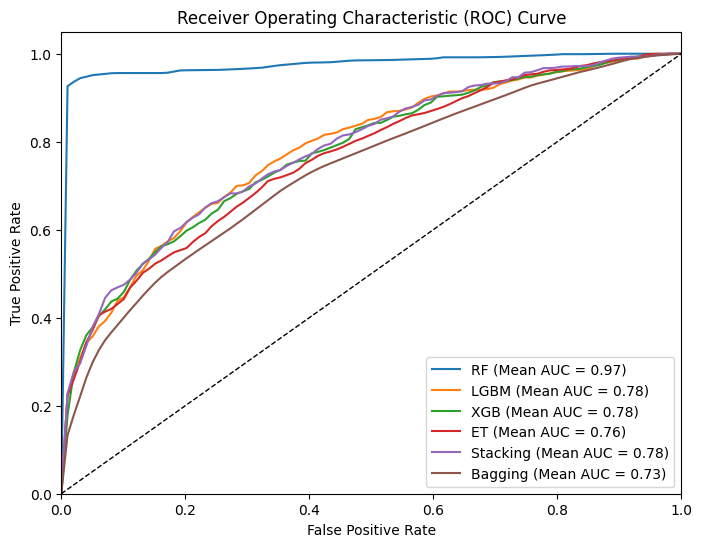

In [ ]:
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt

# Assuming X and y are already defined with your data

# Initialize classifiers
clf1 = RandomForestClassifier(n_estimators=50, max_depth=25, oob_score=True, n_jobs=-1, warm_start=True, random_state=42)
clf2 = LGBMClassifier(random_state=42)
clf3 = XGBClassifier(n_estimators=100, max_depth=9, learning_rate=0.1, random_state=42)
clf4 = ExtraTreesClassifier(random_state=42)
clf6= BaggingClassifier()

# Define your meta-learner
lr = LogisticRegression(random_state=42)

# Define your stacking classifier with the base learners and meta-learner
clf5 = StackingClassifier(
    estimators=[('xgb', clf3),('rf', clf1) ],final_estimator=lr)

classifiers = {'RF': clf1, 'LGBM': clf2, 'XGB': clf3, 'ET': clf4, 'Stacking': clf5, 'Bagging': clf6}

plt.figure(figsize=(8, 6))

# Perform 5-fold cross-validation for each classifier
for clf_name, clf in classifiers.items():
    mean_fpr = np.linspace(0, 1, 100)
    tprs = []
    aucs = []
    kf = KFold(n_splits=10, shuffle=True, random_state=42)

    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        clf.fit(X_train, y_train)
        y_pred_proba = clf.predict_proba(X_test)[:, 1]

        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        tprs.append(np.interp(mean_fpr, fpr, tpr))

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[0] = 0.0
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    plt.plot(mean_fpr, mean_tpr, label=f'{clf_name} (Mean AUC = {mean_auc:.2f})')

plt.plot([0, 1], [0, 1], color='black', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# **Cross Validation 5 Fold**

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:452: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:452: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:452: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:452: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(


[LightGBM] [Info] Number of positive: 709, number of negative: 738
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.038303 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 129953
[LightGBM] [Info] Number of data points in the train set: 1447, number of used features: 516
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.489979 -> initscore=-0.040088
[LightGBM] [Info] Start training from score -0.040088
[LightGBM] [Info] Number of positive: 718, number of negative: 729
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013556 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 129896
[LightGBM] [Info] Number of data points in the train set: 1447, number of used features: 516
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.496199 -> initscore=-0.015204
[LightGBM] [Info] Start training from score -0.015204
[LightGBM] [Info

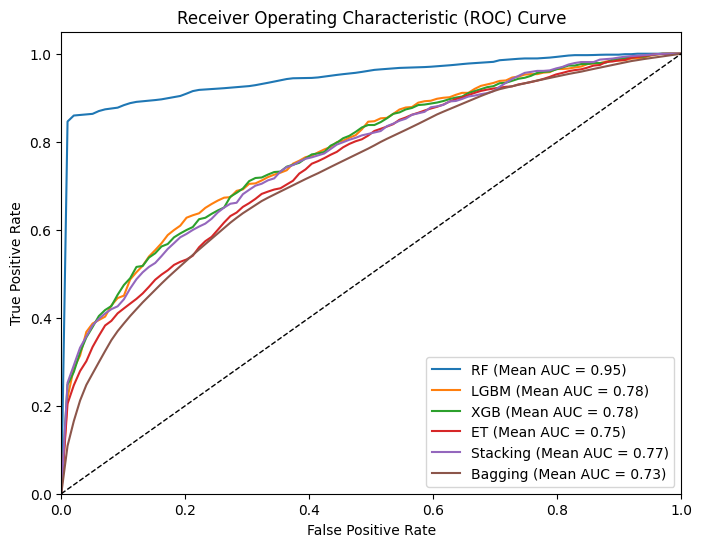

In [ ]:
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt

# Assuming X and y are already defined with your data

# Initialize classifiers
clf1 = RandomForestClassifier(n_estimators=50, max_depth=25, oob_score=True, n_jobs=-1, warm_start=True, random_state=42)
clf2 = LGBMClassifier(random_state=42)
clf3 = XGBClassifier(n_estimators=100, max_depth=9, learning_rate=0.1, random_state=42)
clf4 = ExtraTreesClassifier(random_state=42)
clf6= BaggingClassifier()

# Define your meta-learner
lr = LogisticRegression(random_state=42)

# Define your stacking classifier with the base learners and meta-learner
clf5 = StackingClassifier(
    estimators=[('xgb', clf3),('rf', clf1) ],final_estimator=lr)

classifiers = {'RF': clf1, 'LGBM': clf2, 'XGB': clf3, 'ET': clf4, 'Stacking': clf5, 'Bagging': clf6}

plt.figure(figsize=(8, 6))

# Perform 5-fold cross-validation for each classifier
for clf_name, clf in classifiers.items():
    mean_fpr = np.linspace(0, 1, 100)
    tprs = []
    aucs = []
    kf = KFold(n_splits=5, shuffle=True, random_state=42)

    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        clf.fit(X_train, y_train)
        y_pred_proba = clf.predict_proba(X_test)[:, 1]

        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        tprs.append(np.interp(mean_fpr, fpr, tpr))

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[0] = 0.0
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    plt.plot(mean_fpr, mean_tpr, label=f'{clf_name} (Mean AUC = {mean_auc:.2f})')

plt.plot([0, 1], [0, 1], color='black', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
clf2=LGBMClassifier()
clf1=RandomForestClassifier(n_estimators=50, max_depth=25, oob_score=True, n_jobs=-1, warm_start=True)
clf3 = XGBClassifier(n_estimators=100, max_depth=9, learning_rate=0.1)
clf4=ExtraTreesClassifier()
clf6 = BaggingClassifier(random_state=42)

In [ ]:
lr = LogisticRegression(random_state=42)

# Define your stacking classifier with the base learners and meta-learner
clf5 = StackingClassifier(
    estimators=[('xgb', clf3),('et', clf4),('lgbm', clf2),('rf', clf1) ],final_estimator=lr)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.model_selection import StratifiedKFold, KFold

In [ ]:
kfold=StratifiedKFold(n_splits=5, shuffle=True)

print('5-fold Cross-Validation Random Forest')
iterator = 1
for train, test in kfold.split(X, y):
  print("Fold : " + str(iterator))
  X_train = X[train]
  Y_train = y[train]
  X_test = X[test]
  Y_test = y[test]
  clf=clf1.fit(X_train, Y_train)
  pred=np.round(clf.predict(X_test))
  tn, fp, fn, tp = confusion_matrix(Y_test, pred, labels=[1, 0]).ravel()
  acc = np.round(((tn + tp) / (tn + fp + fn + tp)) * 100, 2)
  sp = np.round((tn / (fp + tn)) * 100, 2)
  sn = np.round((tp / (tp + fn)) * 100, 2)
  mcc = np.round(matthews_corrcoef(Y_test, pred), 5)
  pre = np.round((tp / (tp + fp)) * 100, 2)
  f1 = np.round(2 * (pre * sn) / (pre + sn), 2)
  print("Accuracy: " + str(acc))
  print("Sensitivity/Recall: " + str(sn))
  print("Specificity: " + str(sp))
  print("MCC: " + str(mcc))
  print("Precision: " + str(pre))
  print("F1_Score: " + str(f1))
  iterator = iterator+1

5-fold Cross-Validation Random Forest
Fold : 1
Accuracy: 92.54
Sensitivity/Recall: 94.54
Specificity: 90.5
MCC: 0.85138
Precision: 91.05
F1_Score: 92.76
Fold : 2
Accuracy: 94.2
Sensitivity/Recall: 95.63
Specificity: 92.74
MCC: 0.88427
Precision: 93.09
F1_Score: 94.34
Fold : 3


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:452: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:452: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:452: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(


Accuracy: 95.3
Sensitivity/Recall: 94.54
Specificity: 96.09
MCC: 0.90621
Precision: 96.11
F1_Score: 95.32
Fold : 4
Accuracy: 94.2
Sensitivity/Recall: 93.99
Specificity: 94.41
MCC: 0.88398
Precision: 94.51
F1_Score: 94.25
Fold : 5
Accuracy: 93.91
Sensitivity/Recall: 93.96
Specificity: 93.85
MCC: 0.87811
Precision: 93.96
F1_Score: 93.96


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:452: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:452: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(


In [ ]:
kfold=StratifiedKFold(n_splits=5, shuffle=True)

print('5-fold Cross-Validation LGBM')
iterator = 1
for train, test in kfold.split(X, y):
  print("Fold : " + str(iterator))
  X_train = X[train]
  Y_train = y[train]
  X_test = X[test]
  Y_test = y[test]
  clf=clf2.fit(X_train, Y_train)
  pred=np.round(clf.predict(X_test))
  tn, fp, fn, tp = confusion_matrix(Y_test, pred, labels=[1, 0]).ravel()
  acc = np.round(((tn + tp) / (tn + fp + fn + tp)) * 100, 2)
  sp = np.round((tn / (fp + tn)) * 100, 2)
  sn = np.round((tp / (tp + fn)) * 100, 2)
  mcc = np.round(matthews_corrcoef(Y_test, pred), 5)
  pre = np.round((tp / (tp + fp)) * 100, 2)
  f1 = np.round(2 * (pre * sn) / (pre + sn), 2)
  print("Accuracy: " + str(acc))
  print("Sensitivity/Recall: " + str(sn))
  print("Specificity: " + str(sp))
  print("MCC: " + str(mcc))
  print("Precision: " + str(pre))
  print("F1_Score: " + str(f1))
  iterator = iterator+1

5-fold Cross-Validation LGBM
Fold : 1
[LightGBM] [Info] Number of positive: 716, number of negative: 731
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.020392 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 129947
[LightGBM] [Info] Number of data points in the train set: 1447, number of used features: 516
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.494817 -> initscore=-0.020733
[LightGBM] [Info] Start training from score -0.020733
Accuracy: 69.06
Sensitivity/Recall: 66.67
Specificity: 71.51
MCC: 0.3821
Precision: 70.52
F1_Score: 68.54
Fold : 2
[LightGBM] [Info] Number of positive: 716, number of negative: 731
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014234 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 129894
[LightGBM] [Info] Number o

In [ ]:
kfold=StratifiedKFold(n_splits=5, shuffle=True)

print('5-fold Cross-Validation XGB')
iterator = 1
for train, test in kfold.split(X, y):
  print("Fold : " + str(iterator))
  X_train = X[train]
  Y_train = y[train]
  X_test = X[test]
  Y_test = y[test]
  clf=clf3.fit(X_train, Y_train)
  pred=np.round(clf.predict(X_test))
  tn, fp, fn, tp = confusion_matrix(Y_test, pred, labels=[1, 0]).ravel()
  acc = np.round(((tn + tp) / (tn + fp + fn + tp)) * 100, 2)
  sp = np.round((tn / (fp + tn)) * 100, 2)
  sn = np.round((tp / (tp + fn)) * 100, 2)
  mcc = np.round(matthews_corrcoef(Y_test, pred), 5)
  pre = np.round((tp / (tp + fp)) * 100, 2)
  f1 = np.round(2 * (pre * sn) / (pre + sn), 2)
  print("Accuracy: " + str(acc))
  print("Sensitivity/Recall: " + str(sn))
  print("Specificity: " + str(sp))
  print("MCC: " + str(mcc))
  print("Precision: " + str(pre))
  print("F1_Score: " + str(f1))
  iterator = iterator+1

5-fold Cross-Validation XGB
Fold : 1
Accuracy: 69.61
Sensitivity/Recall: 74.32
Specificity: 64.8
MCC: 0.39314
Precision: 68.34
F1_Score: 71.2
Fold : 2
Accuracy: 71.82
Sensitivity/Recall: 70.49
Specificity: 73.18
MCC: 0.43684
Precision: 72.88
F1_Score: 71.67
Fold : 3
Accuracy: 68.51
Sensitivity/Recall: 69.4
Specificity: 67.6
MCC: 0.37003
Precision: 68.65
F1_Score: 69.02
Fold : 4
Accuracy: 72.38
Sensitivity/Recall: 77.6
Specificity: 67.04
MCC: 0.44907
Precision: 70.65
F1_Score: 73.96
Fold : 5
Accuracy: 71.19
Sensitivity/Recall: 75.82
Specificity: 66.48
MCC: 0.42503
Precision: 69.7
F1_Score: 72.63


In [ ]:
kfold=StratifiedKFold(n_splits=5, shuffle=True)

print('5-fold Cross-Validation ExtraTree')
iterator = 1
for train, test in kfold.split(X, y):
  print("Fold : " + str(iterator))
  X_train = X[train]
  Y_train = y[train]
  X_test = X[test]
  Y_test = y[test]
  clf=clf4.fit(X_train, Y_train)
  pred=np.round(clf.predict(X_test))
  tn, fp, fn, tp = confusion_matrix(Y_test, pred, labels=[1, 0]).ravel()
  acc = np.round(((tn + tp) / (tn + fp + fn + tp)) * 100, 2)
  sp = np.round((tn / (fp + tn)) * 100, 2)
  sn = np.round((tp / (tp + fn)) * 100, 2)
  mcc = np.round(matthews_corrcoef(Y_test, pred), 5)
  pre = np.round((tp / (tp + fp)) * 100, 2)
  f1 = np.round(2 * (pre * sn) / (pre + sn), 2)
  print("Accuracy: " + str(acc))
  print("Sensitivity/Recall: " + str(sn))
  print("Specificity: " + str(sp))
  print("MCC: " + str(mcc))
  print("Precision: " + str(pre))
  print("F1_Score: " + str(f1))
  iterator = iterator+1

5-fold Cross-Validation ExtraTree
Fold : 1
Accuracy: 67.4
Sensitivity/Recall: 71.04
Specificity: 63.69
MCC: 0.34828
Precision: 66.67
F1_Score: 68.79
Fold : 2
Accuracy: 65.47
Sensitivity/Recall: 63.39
Specificity: 67.6
MCC: 0.31007
Precision: 66.67
F1_Score: 64.99
Fold : 3
Accuracy: 70.44
Sensitivity/Recall: 73.77
Specificity: 67.04
MCC: 0.40913
Precision: 69.59
F1_Score: 71.62
Fold : 4
Accuracy: 64.64
Sensitivity/Recall: 71.58
Specificity: 57.54
MCC: 0.2943
Precision: 63.29
F1_Score: 67.18
Fold : 5
Accuracy: 71.75
Sensitivity/Recall: 70.33
Specificity: 73.18
MCC: 0.43526
Precision: 72.73
F1_Score: 71.51


In [ ]:
kfold=StratifiedKFold(n_splits=5, shuffle=True)

print('5-fold Cross-Validation Bagging')
iterator = 1
for train, test in kfold.split(X, y):
  print("Fold : " + str(iterator))
  X_train = X[train]
  Y_train = y[train]
  X_test = X[test]
  Y_test = y[test]
  clf=clf6.fit(X_train, Y_train)
  pred=np.round(clf.predict(X_test))
  tn, fp, fn, tp = confusion_matrix(Y_test, pred, labels=[1, 0]).ravel()
  acc = np.round(((tn + tp) / (tn + fp + fn + tp)) * 100, 2)
  sp = np.round((tn / (fp + tn)) * 100, 2)
  sn = np.round((tp / (tp + fn)) * 100, 2)
  mcc = np.round(matthews_corrcoef(Y_test, pred), 5)
  pre = np.round((tp / (tp + fp)) * 100, 2)
  f1 = np.round(2 * (pre * sn) / (pre + sn), 2)
  print("Accuracy: " + str(acc))
  print("Sensitivity/Recall: " + str(sn))
  print("Specificity: " + str(sp))
  print("MCC: " + str(mcc))
  print("Precision: " + str(pre))
  print("F1_Score: " + str(f1))
  iterator = iterator+1

5-fold Cross-Validation Bagging
Fold : 1
Accuracy: 62.43
Sensitivity/Recall: 72.68
Specificity: 51.96
MCC: 0.25193
Precision: 60.73
F1_Score: 66.17
Fold : 2
Accuracy: 70.72
Sensitivity/Recall: 76.5
Specificity: 64.8
MCC: 0.41613
Precision: 68.97
F1_Score: 72.54
Fold : 3
Accuracy: 68.51
Sensitivity/Recall: 74.32
Specificity: 62.57
MCC: 0.3716
Precision: 67.0
F1_Score: 70.47
Fold : 4
Accuracy: 70.17
Sensitivity/Recall: 76.5
Specificity: 63.69
MCC: 0.40545
Precision: 68.29
F1_Score: 72.16
Fold : 5
Accuracy: 67.87
Sensitivity/Recall: 73.63
Specificity: 62.01
MCC: 0.35892
Precision: 66.34
F1_Score: 69.8


In [ ]:
kfold=StratifiedKFold(n_splits=5, shuffle=True)

print('5-fold Cross-Validation Stacking')
iterator = 1
for train, test in kfold.split(X, y):
  print("Fold : " + str(iterator))
  X_train = X[train]
  Y_train = y[train]
  X_test = X[test]
  Y_test = y[test]
  clf=clf5.fit(X_train, Y_train)
  pred=np.round(clf.predict(X_test))
  tn, fp, fn, tp = confusion_matrix(Y_test, pred, labels=[1, 0]).ravel()
  acc = np.round(((tn + tp) / (tn + fp + fn + tp)) * 100, 2)
  sp = np.round((tn / (fp + tn)) * 100, 2)
  sn = np.round((tp / (tp + fn)) * 100, 2)
  mcc = np.round(matthews_corrcoef(Y_test, pred), 5)
  pre = np.round((tp / (tp + fp)) * 100, 2)
  f1 = np.round(2 * (pre * sn) / (pre + sn), 2)
  print("Accuracy: " + str(acc))
  print("Sensitivity/Recall: " + str(sn))
  print("Specificity: " + str(sp))
  print("MCC: " + str(mcc))
  print("Precision: " + str(pre))
  print("F1_Score: " + str(f1))
  iterator = iterator+1

5-fold Cross-Validation Stacking
Fold : 1
[LightGBM] [Info] Number of positive: 716, number of negative: 731
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011915 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 129895
[LightGBM] [Info] Number of data points in the train set: 1447, number of used features: 516
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.494817 -> initscore=-0.020733
[LightGBM] [Info] Start training from score -0.020733
[LightGBM] [Info] Number of positive: 572, number of negative: 585
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009909 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 129203
[LightGBM] [Info] Number of data points in the train set: 1157, number of used features: 516
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.494382 -> initscore=-0.022473
[LightGBM] [Info] Start trai

# **Boundry Graph**

In [ ]:
pca_50 = PCA(n_components=50)
pca_result_50 = pca_50.fit_transform(X_scaled)
print('Cumulative explained variation for 50 principal components: {}'.format(np.sum(pca_50.explained_variance_ratio_)))

Cumulative explained variation for 50 principal components: 0.9989644289016724


In [ ]:
pca_result_50

array([[ 4.8155184e+00, -1.1028689e-01, -6.9566560e-01, ...,
        -1.7137472e-03,  1.3885142e-02,  5.0165136e-03],
       [ 5.1524868e+00, -1.2104870e-02, -6.9155800e-01, ...,
         3.2813482e-03,  5.3147003e-02,  6.4004876e-02],
       [-8.6607963e-01, -9.2798531e-01,  1.1566530e+00, ...,
        -4.6951156e-03, -3.8053505e-02,  4.3061315e-03],
       ...,
       [-2.3522868e+00,  1.1551679e+00, -3.5682949e-01, ...,
        -4.2392653e-03, -2.7782968e-03,  8.7862369e-03],
       [-2.2825584e+00,  1.1518477e+00, -3.5542563e-01, ...,
        -6.9184136e-03, -6.2089963e-03, -4.1917650e-04],
       [-1.1601487e+00, -9.2197561e-01,  1.2304009e+00, ...,
        -1.5249416e-03,  6.7936368e-03, -1.1943676e-02]], dtype=float32)

In [ ]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=0, perplexity=50, n_iter=300)
tsne_pca_results = tsne.fit_transform(pca_result_50)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 3.9594671726226807 seconds


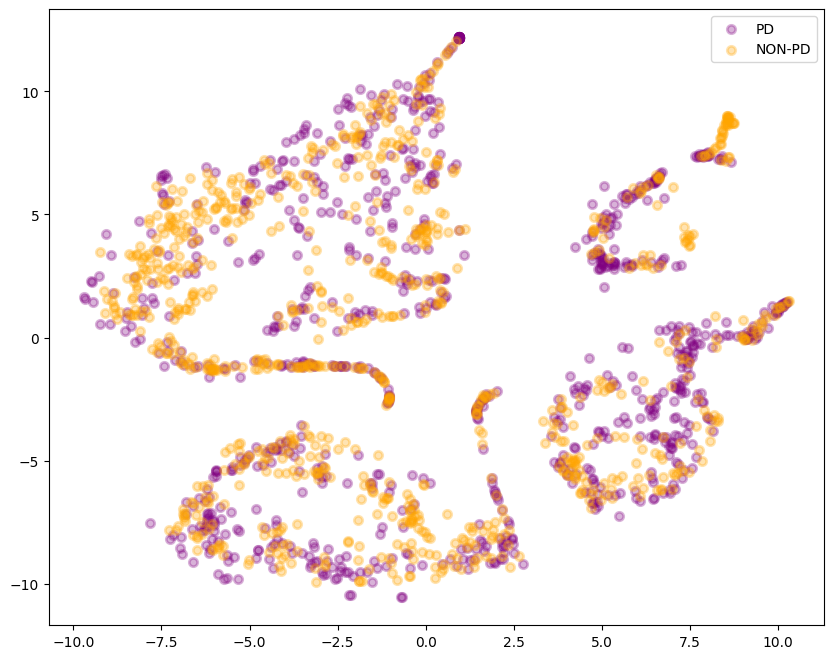

In [ ]:
# visualise again and highlight actual classes of data

target_ids = range(len(y))

plt.figure(figsize=(10, 8))
colours = ['purple','orange' ]
label = ['PD','NON-PD' ]
for i, c, label in zip(target_ids, colours, label):
    plt.scatter(tsne_pca_results[y == i, 0], tsne_pca_results[y == i, 1], c=c, label=label, alpha=0.3, linewidths = 2 )
    pass

plt.legend()
plt.show()

[LightGBM] [Info] Number of positive: 29, number of negative: 31
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000032 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 44
[LightGBM] [Info] Number of data points in the train set: 60, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.483333 -> initscore=-0.066691
[LightGBM] [Info] Start training from score -0.066691
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:452: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(


[LightGBM] [Info] Number of positive: 26, number of negative: 34
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000034 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 43
[LightGBM] [Info] Number of data points in the train set: 60, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.433333 -> initscore=-0.268264
[LightGBM] [Info] Start training from score -0.268264
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:452: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(


[LightGBM] [Info] Number of positive: 532, number of negative: 553
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000081 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 1085, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.490323 -> initscore=-0.038715
[LightGBM] [Info] Start training from score -0.038715


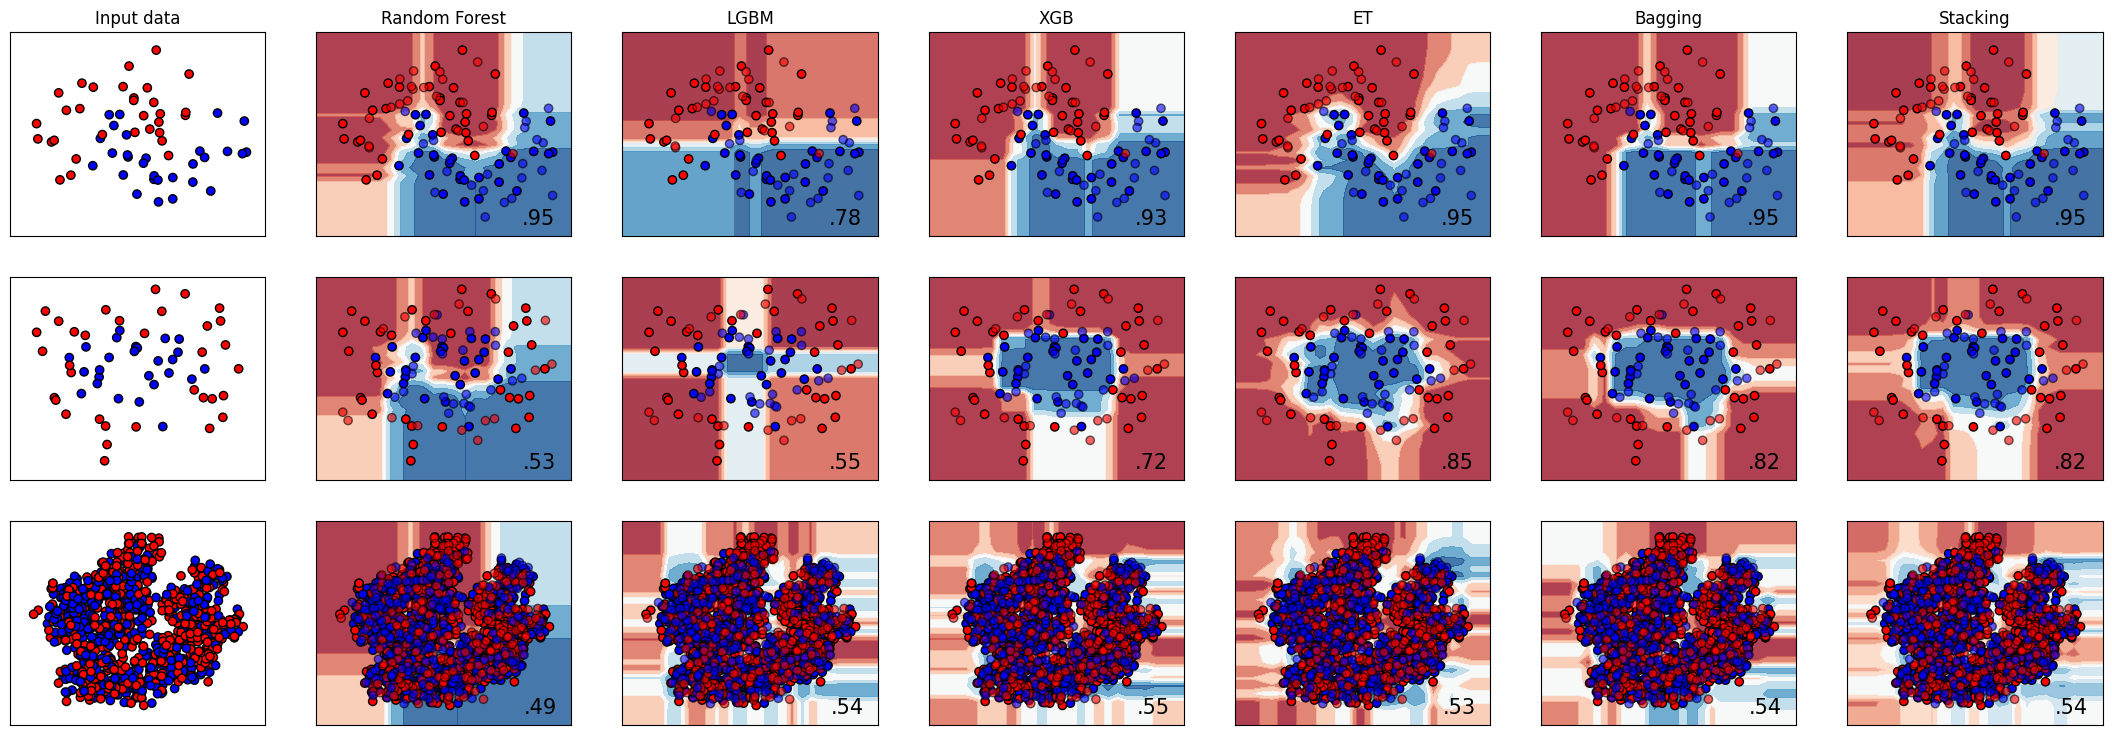

<Figure size 12000x12000 with 0 Axes>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import xgboost as xgb
from xgboost import XGBClassifier

h=0.2
names = [
    "Random Forest",
    "LGBM",
    "XGB",
    "ET",
    "Bagging",
    "Stacking"
]
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=42)

# Define your stacking classifier with the base learners and meta-learner
clf5 = StackingClassifier(
    estimators=[('xgb', clf3),('rf', clf1) ],final_estimator=lr)

classifiers = [
    RandomForestClassifier(n_estimators=50, max_depth=25, oob_score=True, n_jobs=-1, warm_start=True),
   LGBMClassifier(),
    XGBClassifier(n_estimators=100, max_depth=9, learning_rate=0.1),
    ExtraTreesClassifier(),
     BaggingClassifier(),
    clf5
]

X, y =  tsne_pca_results,y
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [
    make_moons(noise=0.3, random_state=0),
    make_circles(noise=0.2, factor=0.5, random_state=1),
    linearly_separable,
]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42
    )

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=0.8)
# Plot the training points
        ax.scatter(
            X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
        )

         # Plot the testing points
        ax.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            cmap=cm_bright,
            edgecolors="k",
            alpha=0.6,
        )
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(
            xx.max() - 0.3,
            yy.min() + 0.3,
            ("%.2f" % score).lstrip("0"),
            size=15,
            horizontalalignment="right",
        )
        i += 1
plt.figure(figsize=(20, 20), dpi=600)

plt.tight_layout()
plt.show()